# Stayze Rent Prediction

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, LabelEncoder, RobustScaler, OneHotEncoder


In [13]:
# load data
df = pd.read_csv('train.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0
1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,NaN,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,NaN,4,82
4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365


In [228]:
df.shape


(34226, 16)

# Data Description

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34214 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34213 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     

# Categorize Data into Numerical and Categorical

In [15]:
num_col = list(df._get_numeric_data().columns)
print(num_col)
cat_col = list(set(df.columns) - set(df._get_numeric_data().columns))
cat_col

['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


['neighbourhood_group',
 'neighbourhood',
 'room_type',
 'name',
 'last_review',
 'host_name']

In [16]:
cat_col = df.select_dtypes(include = 'object')
num_col = df.select_dtypes(include = 'number')
num_col.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,4271676,40.72217,-73.99481,120,7,3,0.06,3,0
1,2243769,11460768,40.80020,-73.96045,1500,1,0,NaN,1,0
2,35515415,267193767,40.75558,-73.89316,200,2,4,4.00,1,365
3,36202006,43392243,40.60110,-74.07830,30,2,0,NaN,4,82
4,3780951,16065171,40.81022,-73.94266,115,1,16,0.27,1,365


# Numerical data description

In [232]:
num_col.describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
id,34226.0,18982085.33,10975972.68,2595.00,9460366.50,19653710.00,2.908201e+07,3.648724e+07
host_id,34226.0,67338469.44,78330910.30,2438.00,7824440.25,30656279.00,1.074344e+08,2.743115e+08
latitude,34226.0,40.73,0.05,40.50,40.69,40.72,4.076000e+01,4.091000e+01
longitude,34226.0,-73.95,0.05,-74.24,-73.98,-73.96,-7.394000e+01,-7.371000e+01
price,34226.0,153.48,243.31,0.00,69.00,107.00,1.750000e+02,1.000000e+04
minimum_nights,34226.0,6.95,20.26,1.00,1.00,2.00,5.000000e+00,1.250000e+03
number_of_reviews,34226.0,23.39,44.48,0.00,1.00,5.00,2.400000e+01,6.290000e+02
reviews_per_month,27244.0,1.38,1.69,0.01,0.19,0.73,2.020000e+00,5.850000e+01
calculated_host_listings_count,34226.0,7.09,32.83,1.00,1.00,1.00,2.000000e+00,3.270000e+02
availability_365,34226.0,113.30,131.89,0.00,0.00,45.00,2.290000e+02,3.650000e+02


# Price Distribution PLot

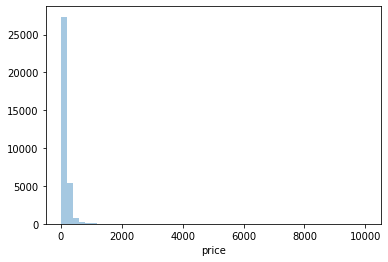

In [17]:
sns.distplot(df['price'], kde=False);

In [234]:
df['price'].fillna(df['price'].mode(), inplace=True)

# Checking for Null Values

In [18]:
df.isnull().sum()*100/df.shape[0]

id                                 0.000000
name                               0.035061
host_id                            0.000000
host_name                          0.037983
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.399696
reviews_per_month                 20.399696
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

# Replacing Null Values

In [19]:
df['last_review'].fillna('2011-03-23',inplace = True)

In [20]:
df['reviews_per_month'].fillna(0,inplace = True)

# Distribution plot for all numerical Values

10


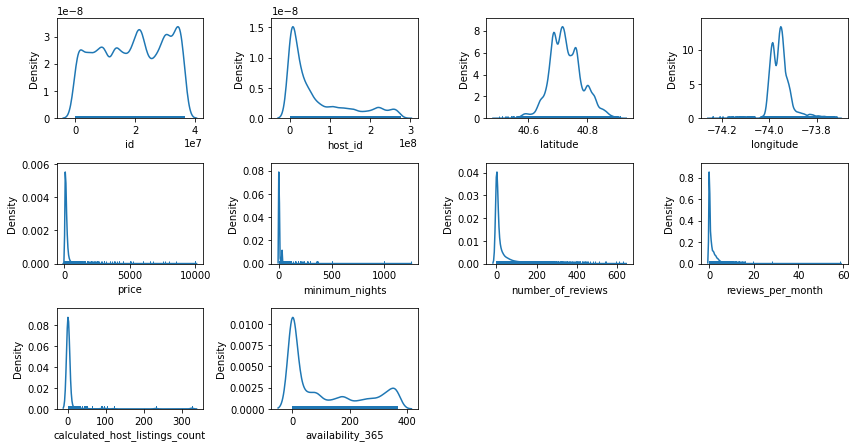

In [21]:
num_col = df.select_dtypes(exclude='object').copy()

print(len(num_col.columns))

fig = plt.figure(figsize=(12,18))
for i in range(len(num_col.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_col.iloc[:,i].dropna(), hist = False, rug = True)
    plt.xlabel(num_col.columns[i])

plt.tight_layout()
plt.show()

# Finding corelation of the numerical features

<AxesSubplot:>

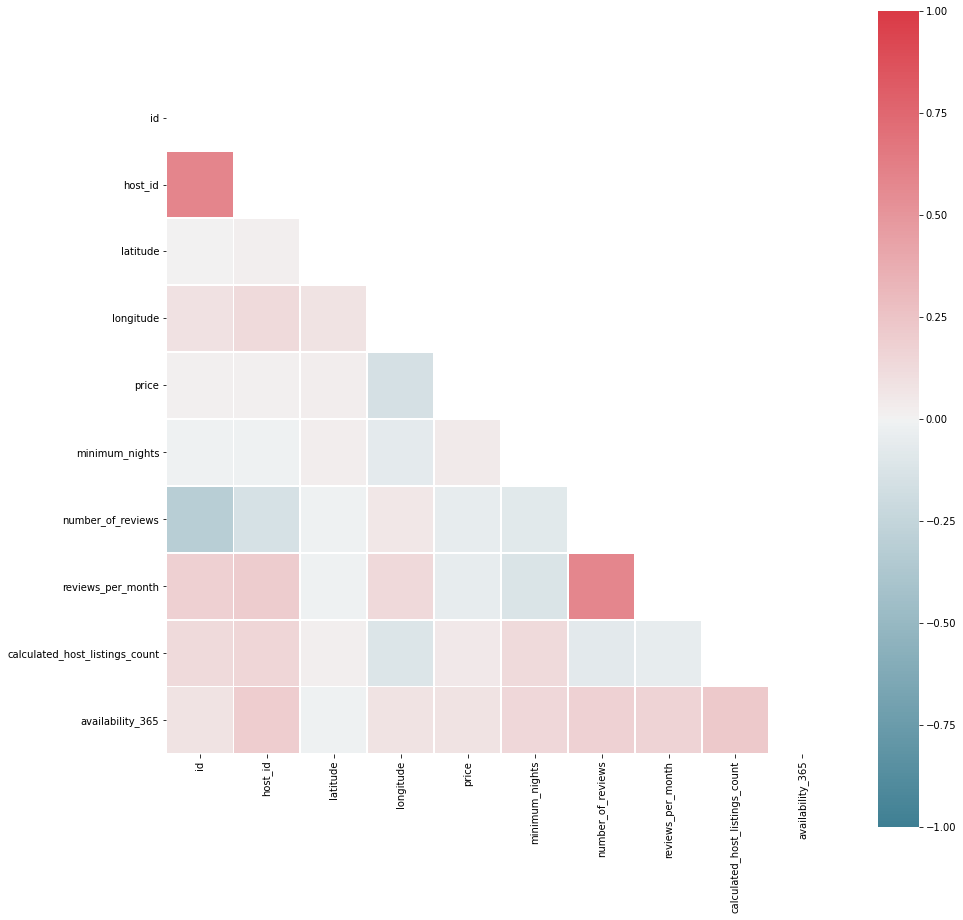

In [22]:
corr = df.corr()

# Using mask to get triangular correlation matrix
f, ax = plt.subplots(figsize=(15, 15))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, vmin = -1.0, vmax = 1.0, linewidths=.5)

In [23]:
corr['price'].sort_values(ascending= False)

price                             1.000000
availability_365                  0.083439
calculated_host_listings_count    0.053688
minimum_nights                    0.045746
latitude                          0.029195
host_id                           0.013679
id                                0.010100
number_of_reviews                -0.048459
reviews_per_month                -0.052865
longitude                        -0.151930
Name: price, dtype: float64

# Dropping unnecessary values from the Categorical featurea

In [24]:
cat_col.drop(['name','host_name'],1,inplace=True)

# Due to multicolinearity of features they are added to each other to treat the colinearity issue

In [25]:
reviews= df['reviews_per_month'] + df['number_of_reviews']
reviews.head()

0     3.06
1     0.00
2     8.00
3     0.00
4    16.27
dtype: float64

# Adding the newly combined feature to the numerical dataframe

In [26]:
num_col['reviews'] = reviews
num_col.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,reviews
0,5728806,4271676,40.72217,-73.99481,120,7,3,0.06,3,0,3.06
1,2243769,11460768,40.80020,-73.96045,1500,1,0,0.00,1,0,0.00
2,35515415,267193767,40.75558,-73.89316,200,2,4,4.00,1,365,8.00
3,36202006,43392243,40.60110,-74.07830,30,2,0,0.00,4,82,0.00
4,3780951,16065171,40.81022,-73.94266,115,1,16,0.27,1,365,16.27


# Removing unnecessary Numerical columns

In [27]:
num_col.drop(['reviews_per_month','number_of_reviews'],1,inplace=True)

In [28]:
num_col.drop(['id','host_id'],1,inplace=True)

# Checking for outliers

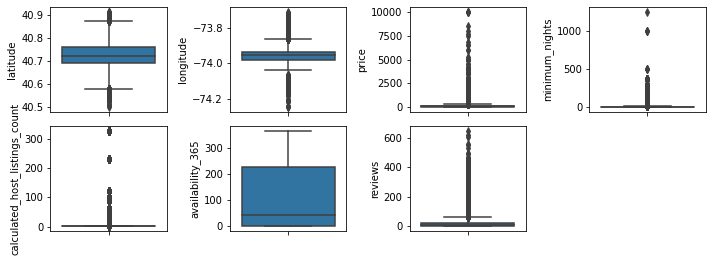

In [29]:
fig = plt.figure(figsize=(10, 15))

for i in range(len(num_col.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_col.iloc[:,i])

plt.tight_layout()
plt.show()

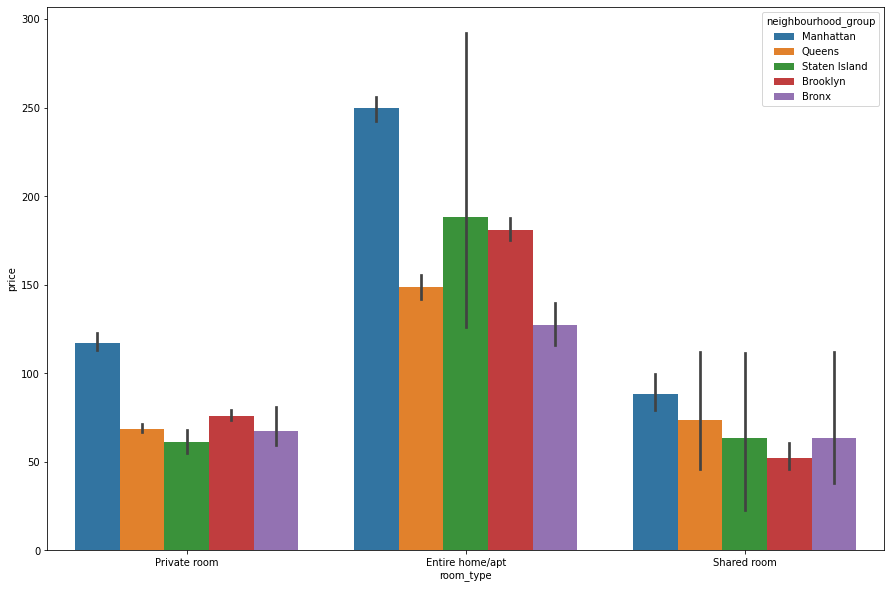

In [30]:
fig = plt.figure(figsize=(15, 10))
sns.barplot(x="room_type", y="price",hue="neighbourhood_group",data=df);

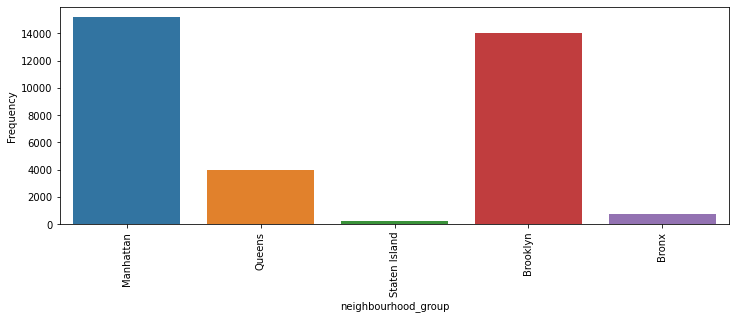

In [31]:
fig = plt.figure(figsize=(12, 4))
sns.countplot(x='neighbourhood_group', data=df)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='availability_365', ylabel='price'>

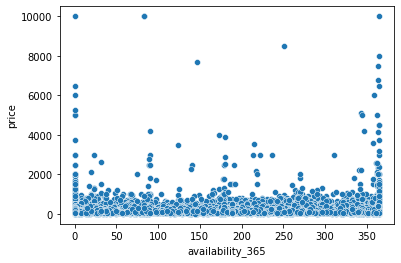

In [32]:
sns.scatterplot(data=df, x="availability_365", y="price")

# Converting Categorical Values to Numerical values

In [33]:
le = LabelEncoder()

le.fit(cat_col['neighbourhood'])
cat_col['neighbourhood']=le.transform(cat_col['neighbourhood'])
le.fit(cat_col['last_review'])
cat_col['last_review']=le.transform(cat_col['last_review'])

In [34]:
categorical_features_one_hot = pd.get_dummies(cat_col[['neighbourhood_group','room_type']])
categorical_features_one_hot.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,1,0,0
2,0,0,0,1,0,1,0,0
3,0,0,0,0,1,0,0,1
4,0,0,1,0,0,0,0,1


# Adding the converted categorical value along with dropping the existing data

In [35]:
cat_col= pd.concat([cat_col,categorical_features_one_hot],1)

In [36]:
cat_col.drop(['neighbourhood_group','room_type'],1,inplace=True)

# Concatinating the processed values to one data frame

In [37]:
data= pd.concat([cat_col,num_col],1)
data.head()

,neighbourhood,last_review,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,reviews
0,143,306,0,0,1,0,0,0,1,0,40.72217,-73.99481,120,7,3,0,3.06
1,200,1671,0,0,1,0,0,1,0,0,40.80020,-73.96045,1500,1,1,0,0.00
2,59,1667,0,0,0,1,0,1,0,0,40.75558,-73.89316,200,2,1,365,8.00
3,46,1671,0,0,0,0,1,0,0,1,40.60110,-74.07830,30,2,4,82,0.00
4,93,1627,0,0,1,0,0,0,0,1,40.81022,-73.94266,115,1,1,365,16.27


# Treating Outliers


In [38]:
high_quant = data.quantile(.95)
for i in data.columns:
  data = data.drop(data[i][data[i]>high_quant[i]].index)
data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 23924 entries, 0 to 34225
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   neighbourhood                      23924 non-null  int32  
 1   last_review                        23924 non-null  int32  
 2   neighbourhood_group_Bronx          23924 non-null  uint8  
 3   neighbourhood_group_Brooklyn       23924 non-null  uint8  
 4   neighbourhood_group_Manhattan      23924 non-null  uint8  
 5   neighbourhood_group_Queens         23924 non-null  uint8  
 6   neighbourhood_group_Staten Island  23924 non-null  uint8  
 7   room_type_Entire home/apt          23924 non-null  uint8  
 8   room_type_Private room             23924 non-null  uint8  
 9   room_type_Shared room              23924 non-null  uint8  
 10  latitude                           23924 non-null  float64
 11  longitude                          23924 non-null  flo

(array([2.7357e+04, 5.4490e+03, 8.0400e+02, 2.7700e+02, 1.2600e+02,
        6.6000e+01, 2.3000e+01, 2.6000e+01, 9.0000e+00, 6.0000e+00,
        2.1000e+01, 5.0000e+00, 1.2000e+01, 2.0000e+00, 6.0000e+00,
        5.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        5.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.,  1400.,
         1600.,  1800.,  2000.,  2200.,  2400.,  2600.,  2800.,  3000.,
         3200.,  3400.,  3600.,  3800.,  4000.,  4200.,  4400.,  4600.,
         4800.,  5000.,  5200.,  5400.,  5600.,  5800.,  6000.,  6200.,
         6400.,  6600.,  6800.

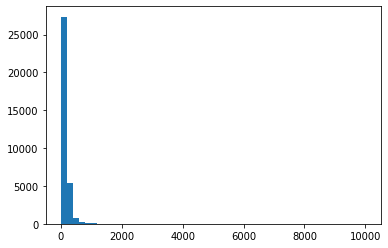

# Assinging the values to target and features

In [39]:
X = data.drop('price',1)
y = data['price']

# Splitting the data

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=33)

# Applying Linear Regression Model

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

Test RMSE: 51.90290179933406


In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
dt_reg = DecisionTreeRegressor(random_state=42)
param_grid = dict(max_depth=range(5,20), min_samples_split=range(50,200,10), min_samples_leaf=range(25,100,10), max_leaf_nodes=range(8,32,2), min_impurity_decrease=(0.3,1.0,0.1))
grid_dt = RandomizedSearchCV(dt_reg, param_grid, scoring='neg_mean_squared_error', n_jobs=4, cv=5, random_state=33)
grid_dt.fit(X_train,y_train)
#dt_pred = grid_dt.best_estimator_.predict(X_val)
dt_pred1 = grid_dt.best_estimator_.predict(X_test)
#dt_pred = np.exp(dt_pred)-1
#dt_pred1 = np.exp(dt_pred1)-1
print(grid_dt.best_params_)

#print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, dt_pred)))
#print('Val RMSE:',np.sqrt(mean_squared_error(y_val, dt_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, dt_pred1)))
#print("R2_score: ",r2_score(y_test,dt_pred))



{'min_samples_split': 110, 'min_samples_leaf': 85, 'min_impurity_decrease': 0.3, 'max_leaf_nodes': 30, 'max_depth': 13}
Test RMSE: 51.13817760048458


# Reading the test data

In [43]:
test_data = pd.read_csv('Test.csv')
test_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1525602,Perfect Temporary Brooklyn Home,1200603,Andrea,Brooklyn,Crown Heights,40.66751,-73.95867,Entire home/apt,2,121,2019-05-31,1.70,1,39
1,30430185,BIG APPLE - COMFY KING ROOM,224414117,Gabriel,Manhattan,Hell's Kitchen,40.75655,-73.99690,Private room,1,18,2019-05-05,2.49,30,364
2,21354525,Cozy Brooklyn Heights Getaway w/ Manhattan Access,11743513,Henry,Brooklyn,Brooklyn Heights,40.69252,-73.99121,Private room,1,87,2019-06-16,4.29,1,108
3,35995074,Amazing*Quiet*Sunny*Bedroom*PrivateLivingRm*Ch...,4128829,Sara,Queens,Ditmars Steinway,40.77292,-73.90101,Private room,9,0,NaN,NaN,2,365
4,34392081,Hello! This is a very cozy space in Williamsburg.,259630588,Alina,Brooklyn,Williamsburg,40.71863,-73.94980,Private room,1,28,2019-06-26,14.00,2,20


In [44]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14669 entries, 0 to 14668
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14669 non-null  int64  
 1   name                            14665 non-null  object 
 2   host_id                         14669 non-null  int64  
 3   host_name                       14661 non-null  object 
 4   neighbourhood_group             14669 non-null  object 
 5   neighbourhood                   14669 non-null  object 
 6   latitude                        14669 non-null  float64
 7   longitude                       14669 non-null  float64
 8   room_type                       14669 non-null  object 
 9   minimum_nights                  14669 non-null  int64  
 10  number_of_reviews               14669 non-null  int64  
 11  last_review                     11599 non-null  object 
 12  reviews_per_month               

# EDA on test data to run the above model on the test data

In [45]:
test_data.shape

(14669, 15)

In [46]:
test_id =test_data['id']

In [47]:
test_data.isnull().sum()*100/df.shape[0]

id                                0.000000
name                              0.011687
host_id                           0.000000
host_name                         0.023374
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       8.969789
reviews_per_month                 8.969789
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [48]:
test_data.drop(['id','host_id'],1,inplace=True)

In [49]:
test_data['reviews_per_month'].fillna(0,inplace = True)

In [50]:
test_data['last_review'].fillna('2011-03-23',inplace = True)

In [51]:
cat_col_t =test_data.select_dtypes(include = 'object')
num_col_t = test_data.select_dtypes(include = 'number')

In [52]:
reviews_t= test_data['reviews_per_month'] + test_data['number_of_reviews']
reviews_t.head()

0    122.70
1     20.49
2     91.29
3      0.00
4     42.00
dtype: float64

In [53]:
num_col_t.drop(['reviews_per_month','number_of_reviews'],1,inplace=True)


In [54]:
num_col_t.head()

,latitude,longitude,minimum_nights,calculated_host_listings_count,availability_365
0,40.66751,-73.95867,2,1,39
1,40.75655,-73.99690,1,30,364
2,40.69252,-73.99121,1,1,108
3,40.77292,-73.90101,9,2,365
4,40.71863,-73.94980,1,2,20


In [55]:
num_col_t['reviews']=reviews_t
num_col_t

,latitude,longitude,minimum_nights,calculated_host_listings_count,availability_365,reviews
0,40.66751,-73.95867,2,1,39,122.70
1,40.75655,-73.99690,1,30,364,20.49
2,40.69252,-73.99121,1,1,108,91.29
3,40.77292,-73.90101,9,2,365,0.00
4,40.71863,-73.94980,1,2,20,42.00
...,...,...,...,...,...,...
14664,40.59446,-73.94289,2,1,36,1.59
14665,40.74319,-73.98074,2,1,365,1.16
14666,40.82519,-73.94530,1,3,358,94.34
14667,40.72238,-73.99466,1,8,34,16.12


In [56]:
le_t = LabelEncoder()

le_t.fit(cat_col_t['neighbourhood'])
cat_col_t['neighbourhood']=le_t.transform(cat_col_t['neighbourhood'])
le_t.fit(cat_col_t['last_review'])
cat_col_t['last_review']=le_t.transform(cat_col_t['last_review'])

In [57]:
categorical_features_one_hot_t = pd.get_dummies(cat_col_t[['neighbourhood_group','room_type']])
categorical_features_one_hot_t.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,1,0
2,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,1,0


In [58]:
cat_col_t= pd.concat([cat_col_t,categorical_features_one_hot_t],1)

In [59]:
cat_col_t.drop(['neighbourhood_group','room_type'],1,inplace=True)
cat_col_t.head()

,name,host_name,neighbourhood,last_review,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Perfect Temporary Brooklyn Home,Andrea,49,1351,0,1,0,0,0,1,0,0
1,BIG APPLE - COMFY KING ROOM,Gabriel,93,1325,0,0,1,0,0,0,1,0
2,Cozy Brooklyn Heights Getaway w/ Manhattan Access,Henry,24,1367,0,1,0,0,0,0,1,0
3,Amazing*Quiet*Sunny*Bedroom*PrivateLivingRm*Ch...,Sara,52,0,0,0,0,1,0,0,1,0
4,Hello! This is a very cozy space in Williamsburg.,Alina,200,1377,0,1,0,0,0,0,1,0


In [60]:
cat_col_t.drop(['name','host_name'],1,inplace =True)

In [61]:
cat_col_t.head()

,neighbourhood,last_review,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,49,1351,0,1,0,0,0,1,0,0
1,93,1325,0,0,1,0,0,0,1,0
2,24,1367,0,1,0,0,0,0,1,0
3,52,0,0,0,0,1,0,0,1,0
4,200,1377,0,1,0,0,0,0,1,0


In [62]:
data_t= pd.concat([cat_col_t,num_col_t],1)
data_t.head()

,neighbourhood,last_review,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,latitude,longitude,minimum_nights,calculated_host_listings_count,availability_365,reviews
0,49,1351,0,1,0,0,0,1,0,0,40.66751,-73.95867,2,1,39,122.70
1,93,1325,0,0,1,0,0,0,1,0,40.75655,-73.99690,1,30,364,20.49
2,24,1367,0,1,0,0,0,0,1,0,40.69252,-73.99121,1,1,108,91.29
3,52,0,0,0,0,1,0,0,1,0,40.77292,-73.90101,9,2,365,0.00
4,200,1377,0,1,0,0,0,0,1,0,40.71863,-73.94980,1,2,20,42.00


In [63]:
data_t.shape

(14669, 16)

In [64]:
y_pred_t = lr.predict(data_t)

In [65]:
y_pred_t

array([134.09279694, 141.93353547,  83.04576589, ..., 110.68574848,
       193.80165981, 137.38320218])

In [66]:
df_t = pd.concat([test_id,data_t],1)

In [67]:
dt_pred2 = grid_dt.best_estimator_.predict(data_t)

In [68]:
dt_pred2

array([110.28445748, 123.28712871,  82.01511628, ...,  80.61641392,
       200.82723577, 139.75463306])

# The final output in CSV file format

In [69]:
submissions = pd.DataFrame(y_pred_t,index = df_t['id'],columns = ['price'])

In [70]:
submissions_dt = pd.DataFrame(dt_pred2,index = df_t['id'],columns = ['price'])

In [71]:
submissions.head()

,price
id,
1525602,134.092797
30430185,141.933535
21354525,83.045766
35995074,58.634576
34392081,76.229839


In [72]:
submissions_dt.head()

,price
id,
1525602,110.284457
30430185,123.287129
21354525,82.015116
35995074,62.672521
34392081,82.015116


In [73]:
submissions.to_csv('submission1_stayze.csv', index=True)

In [74]:
submissions_dt.to_csv('submission_dt_stayze.csv', index=True)

In [75]:
orignal_price = pd.read_csv('orignal_file.csv')
team_price = pd.read_csv('submission1_stayze.csv')


In [76]:
# getting the rmse
np.sqrt(mean_squared_error(orignal_price['price'],team_price['price']))

227.01975354105673